In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
# 2. Đọc file dữ liệu tiền ảo
df = pd.read_csv('BNB2019-2024.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)



In [5]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data1 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print(last_index)

Predicted closing prices for the next 30 days:
[681.74299165 682.16434905 682.58570644 683.00706384 683.42842124
 683.84977864 684.27113604 684.69249343 685.11385083 685.53520823
 685.95656563 686.37792302 686.79928042 687.22063782 687.64199522
 688.06335261 688.48471001 688.90606741 689.32742481 689.74878221
 690.1701396  690.591497   691.0128544  691.4342118  691.85556919
 692.27692659 692.69828399 693.11964139 693.54099878 693.96235618]
1814


In [6]:
# 7. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data2 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[681.74299165 682.16434905 682.58570644 683.00706384 683.42842124
 683.84977864 684.27113604 684.69249343 685.11385083 685.53520823
 685.95656563 686.37792302 686.79928042 687.22063782 687.64199522
 688.06335261 688.48471001 688.90606741 689.32742481 689.74878221
 690.1701396  690.591497   691.0128544  691.4342118  691.85556919
 692.27692659 692.69828399 693.11964139 693.54099878 693.96235618
 694.38371358 694.80507098 695.22642838 695.64778577 696.06914317
 696.49050057 696.91185797 697.33321536 697.75457276 698.17593016
 698.59728756 699.01864495 699.44000235 699.86135975 700.28271715
 700.70407455 701.12543194 701.54678934 701.96814674 702.38950414
 702.81086153 703.23221893 703.65357633 704.07493373 704.49629112
 704.91764852 705.33900592 705.76036332 706.18172071 706.60307811]


In [7]:
# 8. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data3 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[681.74299165 682.16434905 682.58570644 683.00706384 683.42842124
 683.84977864 684.27113604 684.69249343 685.11385083 685.53520823
 685.95656563 686.37792302 686.79928042 687.22063782 687.64199522
 688.06335261 688.48471001 688.90606741 689.32742481 689.74878221
 690.1701396  690.591497   691.0128544  691.4342118  691.85556919
 692.27692659 692.69828399 693.11964139 693.54099878 693.96235618
 694.38371358 694.80507098 695.22642838 695.64778577 696.06914317
 696.49050057 696.91185797 697.33321536 697.75457276 698.17593016
 698.59728756 699.01864495 699.44000235 699.86135975 700.28271715
 700.70407455 701.12543194 701.54678934 701.96814674 702.38950414
 702.81086153 703.23221893 703.65357633 704.07493373 704.49629112
 704.91764852 705.33900592 705.76036332 706.18172071 706.60307811
 707.02443551 707.44579291 707.86715031 708.2885077  708.7098651
 709.1312225  709.5525799  709.97393729 710.39529469 710.81665209
 711.23800949 711.65936688 712

In [8]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)


Testing RMSE: 304.9665107109461


Testing RMSE: 304.9665107109461


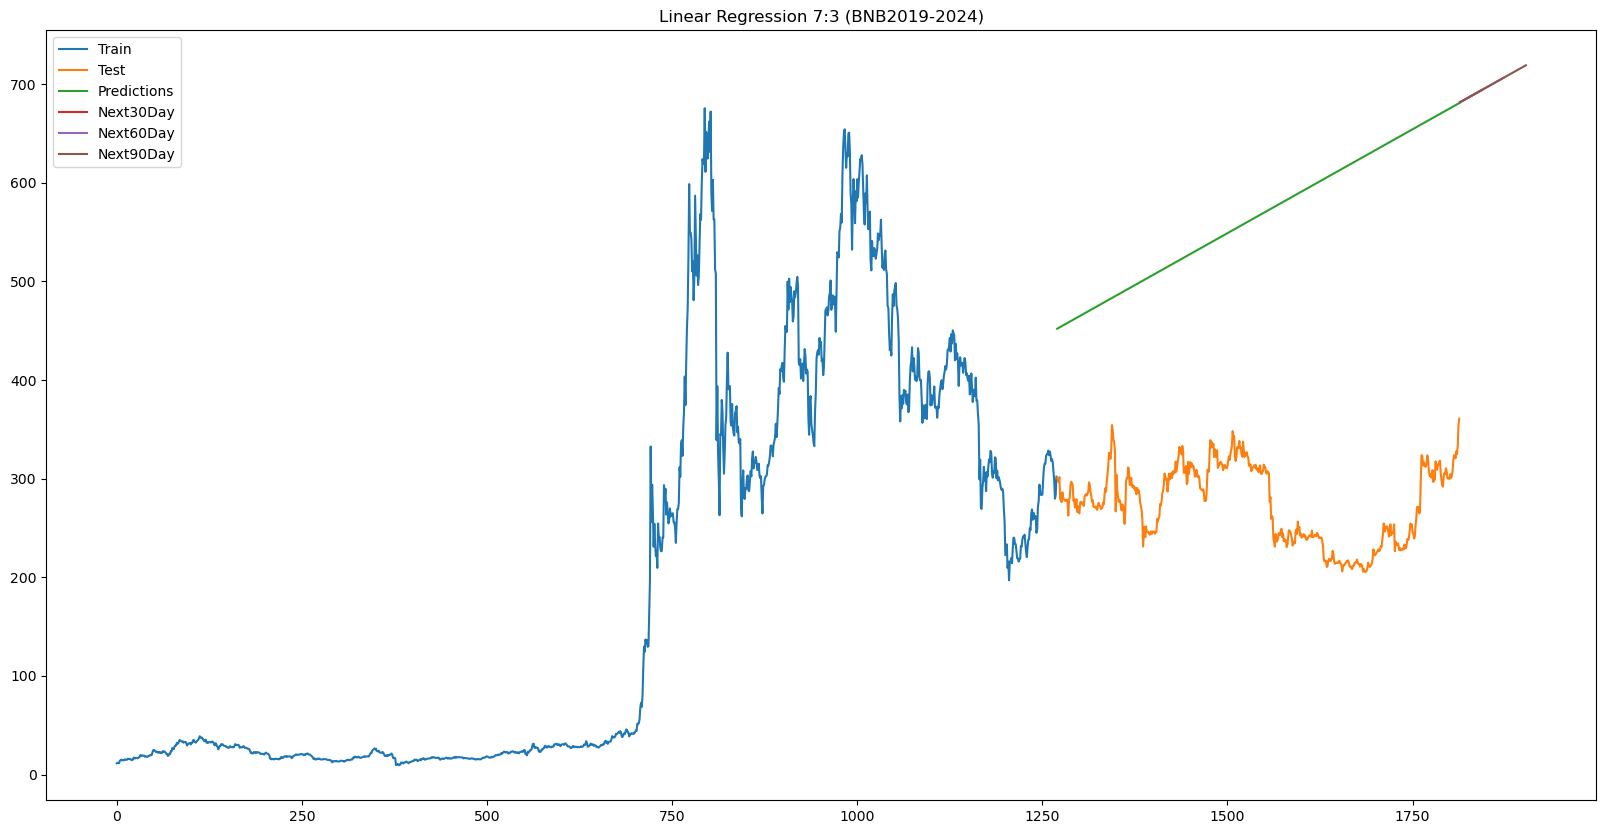

In [12]:
# 8. Tính RMSE
plt.figure(figsize=(20, 10))
plt.title('Linear Regression 7:3 (BNB2019-2024)')
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data1,y_next_30_days)
plt.plot(last_data2,y_next_60_days)
plt.plot(last_data3,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day','Next60Day','Next90Day'])
plt.show()

In [10]:
test_data.index

RangeIndex(start=1270, stop=1814, step=1)